# Mejoras de código en simulación y optimización de portafolios

> En clases anteriores observamos que la función minimize de scipy.optimize no fue adecuada para calcular la frontera eficiente de portafolios. Para cumplir este objetivo, utilizaremos una librería especializada en optimización convexa para Python llamada `cvxopt`.

> Por otra parte, ya entendimos la manera de simular portafolios por montecarlo, así que no es relevante tener que programar estas simulaciones cada vez. Tampoco es relevante tener que programar la obtención de la frontera eficiente por optimización una y otra vez.

> Por lo anterior, incluiremos en el script `portfolio_func.py` un compendio de funciones para este objetivo.

## 0. Librerías necesarias

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
solvers.options['show_progress'] = False
%matplotlib inline
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)
#Funciones para portafolios
import portfolio_func

## 1. Descargar precios de cierre

En el script `portfolio_func.py` se incluyó la función `get_historical_closes(ticker, start_date, end_date)` que hemos venido usando en clase...

In [2]:
tickers = ['AA', 'AAPL', 'AMZN', 'MSFT']
closes = portfolio_func.get_historical_closes(tickers, '2016-01-01')

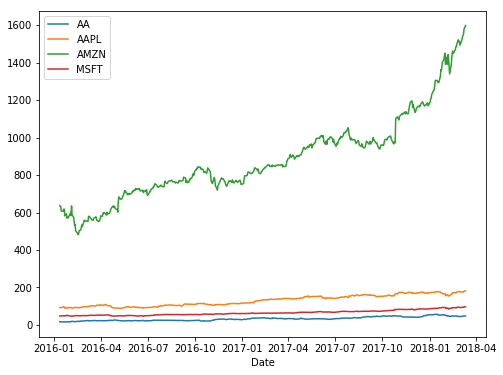

In [3]:
closes.plot(figsize=(8,6))

## 2. Formulación del riesgo de un portafolio y simulación Montecarlo

En el script `portfolio_func.py` se incluyó la función `calc_daily_ret(closes)`

In [4]:
daily_ret = portfolio_func.calc_daily_ret(closes)

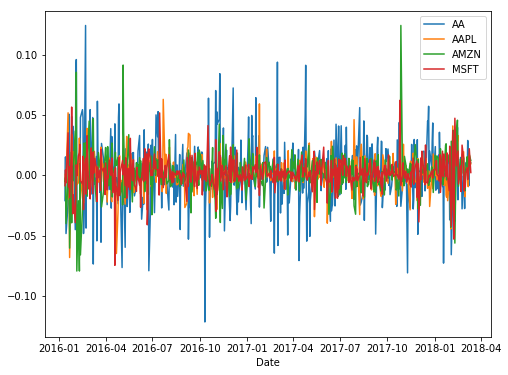

In [5]:
daily_ret.plot(figsize=(8,6));

In [11]:
daily_ret

,AA,AAPL,AMZN,MSFT
Date,,,,
2016-01-13,-0.021,-4.851e-03,-0.005,-0.008
2016-01-14,0.015,1.344e-03,-0.002,0.005
2016-01-15,-0.048,-5.075e-03,-0.040,-0.006
2016-01-19,-0.023,5.180e-02,-0.001,0.035
2016-01-20,0.000,-1.972e-02,0.017,-0.010
...,...,...,...,...
2018-03-06,0.029,-8.487e-04,0.009,-0.003
2018-03-07,0.019,-9.326e-03,0.005,0.006
2018-03-08,-0.009,1.085e-02,0.004,0.006


De igual forma, se incluyó la función `sim_mont_portfolio(daily_ret, num_portfolios, risk_free)`

In [6]:
results_mont = portfolio_func.sim_mont_portfolio(daily_ret, 10000, 0.015)

In [7]:
results_mont

,Rendimiento,SD,Sharpe,...,AAPL,AMZN,MSFT
0,0.422,0.189,2.149,...,0.003,0.263,0.357
1,0.377,0.156,2.319,...,0.532,0.187,0.092
2,0.350,0.163,2.053,...,0.634,0.087,0.178
3,0.369,0.155,2.285,...,0.303,0.073,0.424
4,0.433,0.208,2.006,...,0.172,0.281,0.098
...,...,...,...,...,...,...,...
9995,0.366,0.142,2.463,...,0.201,0.244,0.498
9996,0.394,0.148,2.563,...,0.319,0.297,0.181
9997,0.374,0.141,2.540,...,0.254,0.196,0.408
9998,0.410,0.168,2.346,...,0.224,0.266,0.192


Obtener los portafolios con sharpe máximo y con mínima volatilidad, respectivamente

In [23]:
min_vol_port = results_mont.iloc[results_mont.SD.idxmin()]
max_sharpe_port = results_mont.iloc[results_mont.Sharpe.idxmax()]

Graficar **Rendimiento vs. Volatilidad** con `matplotlib.pyplot.scatter`, colorear con el código 'RdYlBu' de acuerdo al sharpe, y resaltar los portafolios de máximo sharpe y mínima volatilidad...

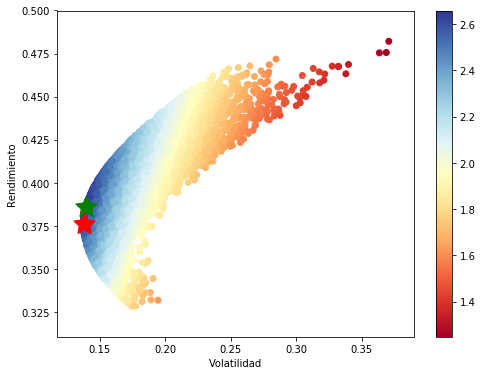

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(results_mont.SD, results_mont.Rendimiento, cmap = 'RdYlBu', c = results_mont.Sharpe)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.colorbar()

plt.scatter(max_sharpe_port.SD, max_sharpe_port.Rendimiento, marker=(5,1,0), s=500, c='g')
plt.scatter(min_vol_port.SD, min_vol_port.Rendimiento, marker=(5,1,0), s=500, c='r')

## 3. Optimización de portafolios

En el script `portfolio_func.py`, se incluyó la función `optimal_portfolio(daily_ret, n_opt, risk_free)`

In [25]:
results_opt = portfolio_func.optimal_portfolio(daily_ret, 100, 0.015)

In [26]:
results_opt

,Rendimiento,SD,Sharpe,...,AAPL,AMZN,MSFT
0,0.376,0.138,2.619,...,2.715e-01,2.802e-01,3.483e-01
1,0.376,0.138,2.619,...,2.715e-01,2.802e-01,3.483e-01
2,0.376,0.138,2.619,...,2.715e-01,2.802e-01,3.483e-01
3,0.376,0.138,2.619,...,2.715e-01,2.802e-01,3.483e-01
4,0.376,0.138,2.619,...,2.715e-01,2.802e-01,3.483e-01
...,...,...,...,...,...,...,...
95,0.487,0.363,1.302,...,6.888e-06,1.320e-01,8.148e-06
96,0.489,0.375,1.263,...,2.783e-06,9.903e-02,2.869e-06
97,0.490,0.388,1.225,...,1.080e-05,6.591e-02,5.491e-06
98,0.492,0.401,1.190,...,5.640e-06,3.297e-02,2.546e-06


Comparar simulación montecarlo con frontera eficiente obtenida por optimización convexa...

Text(0,0.5,'Rendimiento')

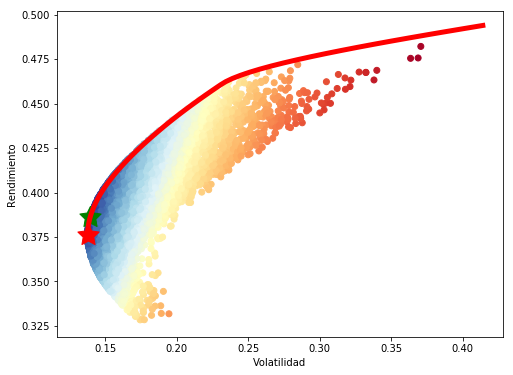

In [33]:
plt.figure(figsize=(8,6))
plt.plot(results_opt.SD, results_opt.Rendimiento, 'r', lw = 5)

plt.scatter(results_mont.SD, results_mont.Rendimiento, cmap = 'RdYlBu', c = results_mont.Sharpe)
plt.scatter(max_sharpe_port.SD, max_sharpe_port.Rendimiento, marker=(5,1,0), s=500, c='g')
plt.scatter(min_vol_port.SD, min_vol_port.Rendimiento, marker=(5,1,0), s=500, c='r')
#plt.colorbar()

plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')

Señalar portafolios de mínima volatilidad y de máximo sharpe

In [34]:
min_vol_port = results_opt.iloc[results_opt.SD.idxmin()]
max_sharpe_port = results_opt.iloc[results_opt.Sharpe.idxmax()]

Text(0,0.5,'Rendimiento')

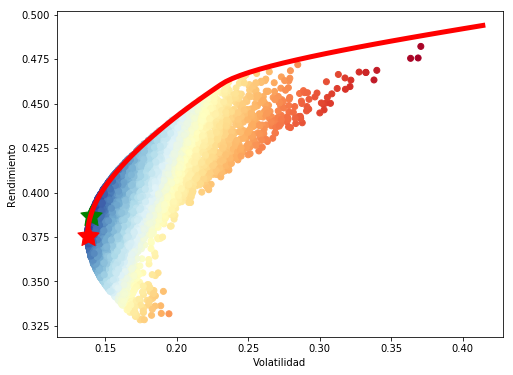

In [35]:
plt.figure(figsize=(8,6))
plt.plot(results_opt.SD, results_opt.Rendimiento, 'r', lw = 5)

plt.scatter(results_mont.SD, results_mont.Rendimiento, cmap = 'RdYlBu', c = results_mont.Sharpe)
plt.scatter(max_sharpe_port.SD, max_sharpe_port.Rendimiento, marker=(5,1,0), s=500, c='g')
plt.scatter(min_vol_port.SD, min_vol_port.Rendimiento, marker=(5,1,0), s=500, c='r')
#plt.colorbar()

plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')

## 4. Optimización incluyendo bono

En el script `portfolio_func.py`, se incluyó la función `optimal_portfolio_b(daily_ret, n_opt, risk_free, c0)`

In [50]:
results_opt_b = portfolio_func.optimal_portfolio_b(daily_ret, 100, 0.015, 0.01/252)

In [51]:
results_opt_b

,Rendimiento,SD,Sharpe,...,AMZN,MSFT,BOND
0,0.017,0.002,0.641,...,4.624e-03,4.935e-03,9.825e-01
1,0.017,0.003,0.736,...,4.908e-03,5.197e-03,9.817e-01
2,0.020,0.004,1.309,...,7.109e-03,7.431e-03,9.739e-01
3,0.025,0.005,1.764,...,1.116e-02,1.130e-02,9.611e-01
4,0.030,0.007,2.015,...,1.700e-02,1.653e-02,9.474e-01
...,...,...,...,...,...,...,...
95,0.474,0.283,1.624,...,3.680e-01,1.059e-06,1.856e-07
96,0.479,0.311,1.491,...,2.760e-01,9.303e-07,1.661e-07
97,0.484,0.343,1.366,...,1.840e-01,1.023e-06,1.802e-07
98,0.489,0.378,1.255,...,9.201e-02,5.964e-07,1.088e-07


Portafolios de mínima volatilidad y máximo sharpe

In [52]:
min_vol_port = results_opt_b.iloc[results_opt_b.SD.idxmin()]
max_sharpe_port = results_opt_b.iloc[results_opt_b.Sharpe.idxmax()]

Gráficos de frontera y portafolios notables

Text(0,0.5,'Rendimiento')

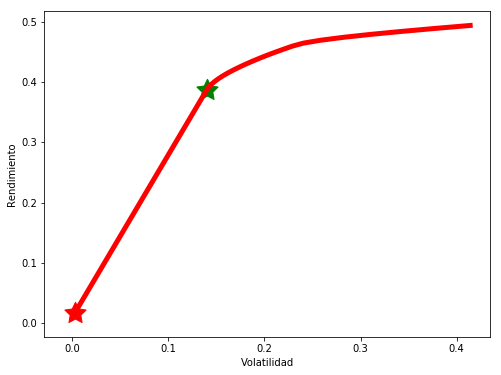

In [53]:
plt.figure(figsize=(8,6))
plt.plot(results_opt_b.SD, results_opt_b.Rendimiento, 'r', lw = 5)

plt.scatter(max_sharpe_port.SD, max_sharpe_port.Rendimiento, marker=(5,1,0), s=500, c='g')
plt.scatter(min_vol_port.SD, min_vol_port.Rendimiento, marker=(5,1,0), s=500, c='r')
#plt.colorbar()

plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')

In [54]:
max_sharpe_port

Rendimiento    0.386
SD             0.140
Sharpe         2.659
AA             0.137
AAPL           0.217
AMZN           0.328
MSFT           0.314
BOND           0.004
Name: 77, dtype: float64

In [55]:
min_vol_port

Rendimiento    0.017
SD             0.002
Sharpe         0.641
AA             0.003
AAPL           0.005
AMZN           0.005
MSFT           0.005
BOND           0.983
Name: 0, dtype: float64

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>